Dataset Shape: (100, 7)

Missing Values:
 Date               0
ProductID          0
ProductCategory    0
Quantity           0
UnitPrice          0
Discount           0
Sales              0
dtype: int64

Summary Statistics:
                       Date    ProductID    Quantity   UnitPrice    Discount  \
count                  100   100.000000  100.000000  100.000000  100.000000   
mean   2023-07-09 08:09:36  1045.630000    3.140000  477.591100    0.092500   
min    2023-01-01 00:00:00  1003.000000    1.000000   16.740000    0.000000   
25%    2023-03-14 00:00:00  1021.000000    2.000000  222.500000    0.050000   
50%    2023-07-29 00:00:00  1045.000000    3.000000  458.900000    0.075000   
75%    2023-10-12 00:00:00  1071.250000    4.000000  746.162500    0.150000   
max    2023-12-30 00:00:00  1100.000000    5.000000  991.210000    0.200000   
std                    NaN    28.117594    1.477235  288.507414    0.069767   

             Sales  
count   100.000000  
mean   1325.324805  
m

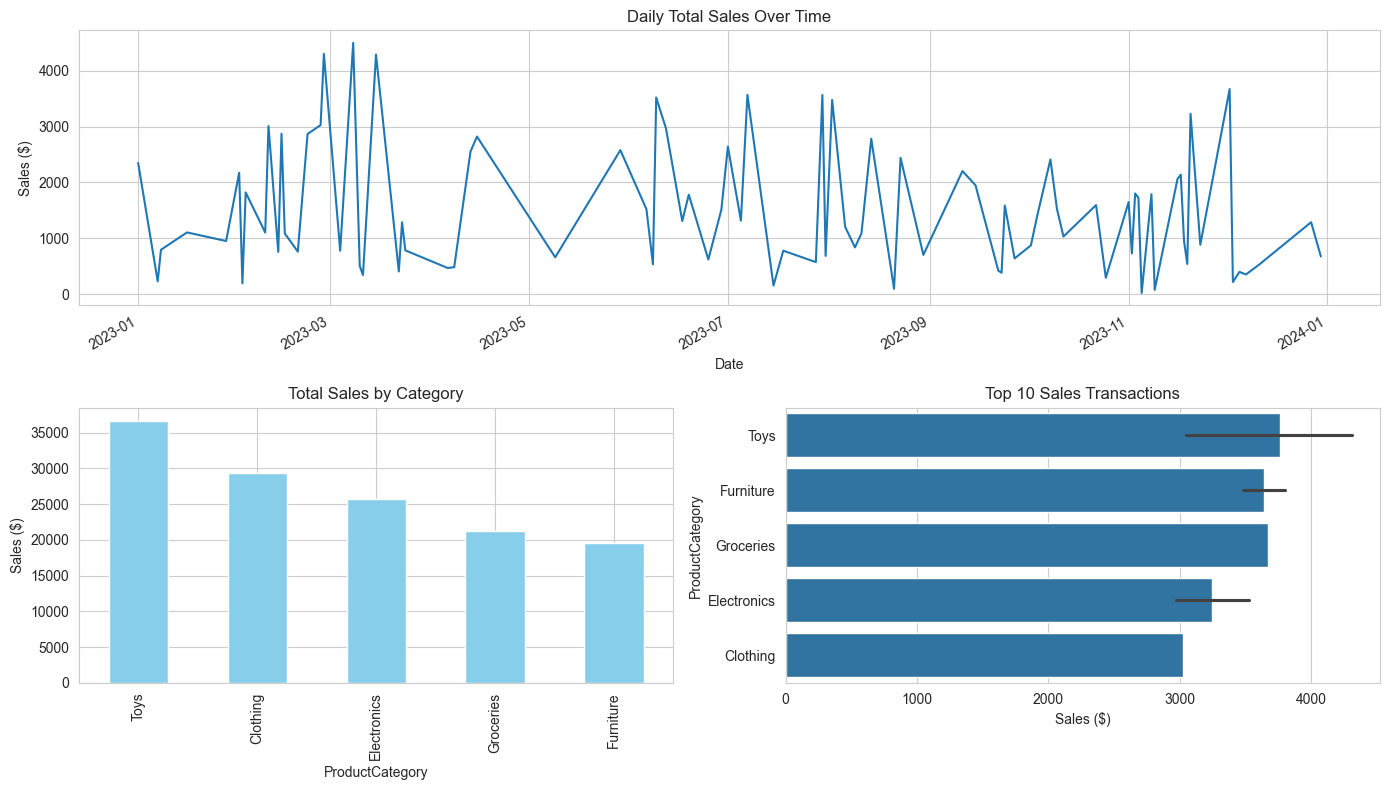

In [2]:

# Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Dataset
df = pd.read_csv('D:/Downloads/retail_sales.csv')

# Data Cleaning & Feature Engineering
df['Date'] = pd.to_datetime(df['Date'])  # Convert date to datetime
df['Sales'] = df['Quantity'] * df['UnitPrice'] * (1 - df['Discount'])  # Calculate net sales

#  Descriptive Statistics
print("Dataset Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
print("\nSummary Statistics:\n", df.describe())

# Total Sales by Category
sales_by_category = df.groupby('ProductCategory')['Sales'].sum().sort_values(ascending=False)
print("\nSales by Category:\n", sales_by_category)

#  Total Sales Over Time
sales_by_date = df.groupby('Date')['Sales'].sum()

#  Visualization Setup
plt.figure(figsize=(14, 8))
sns.set_style('whitegrid')

#  1. Sales Trend Over Time
plt.subplot(2, 1, 1)
sales_by_date.plot()
plt.title('Daily Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales ($)')

#  2. Sales by Product Category
plt.subplot(2, 2, 3)
sales_by_category.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Category')
plt.ylabel('Sales ($)')

#  3. Top 10 Highest Transactions
top_sales = df.sort_values(by='Sales', ascending=False).head(10)
plt.subplot(2, 2, 4)
sns.barplot(x=top_sales['Sales'], y=top_sales['ProductCategory'])
plt.title('Top 10 Sales Transactions')
plt.xlabel('Sales ($)')

plt.tight_layout()
plt.show()
